In [1]:
# filter some warning messages
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import xarray as xr
import pandas as pd

import gsw
import copy
import os

In [3]:
import zarr
import gcsfs
# this only needs to be created once
gcs = gcsfs.GCSFileSystem(token='anon')

In [14]:
datapd = pd.read_csv("dataset_wcoords.csv")
areacello_pd = pd.read_csv("areacello.csv")

In [16]:
ni = []
for i in range(0, len(areacello_pd)):
    fname = areacello_pd.at[i, 'source_id'] + '.' + areacello_pd.at[i, 'grid_label'] + '.nc'
    fpath = 'data_areacello/' + fname

    if os.path.exists(fpath):
        print(fname)
        continue

    ds = xr.open_zarr(gcs.get_mapper(areacello_pd.at[i,'zstore']), consolidated=True)
    print(fname)
    print(ds, "\n")
#     da = ds.siconc

#     if 'type' in da.coords:
#         da = da.reset_coords('type', drop = True)

#     if pd.isna(datapd.at[i, 'latname']):
#         if pd.isna(datapd.at[i, 'xname']):
#             ni.append(i)
#             continue
#         else:
#             if datapd.at[i, 'xname'] == 'lon':
#                 da_south = da.sel(lat = slice(-90, -50))
#             else:
#                 ni.append(i)
#                 continue
#     else:
#         da_south = da.where(da[datapd.at[i, 'latname']] < -50, drop=True)

#     da_sep = list(da_south.groupby('time.month'))[8][-1]
    
#     da_sep.to_netcdf(fpath)
#     print(fname)

# print(ni)

ACCESS-CM2.gn.nc
<xarray.Dataset>
Dimensions:             (j: 300, i: 360, vertices: 4)
Coordinates:
  * i                   (i) int32 0 1 2 3 4 5 6 ... 353 354 355 356 357 358 359
  * j                   (j) int32 0 1 2 3 4 5 6 ... 293 294 295 296 297 298 299
    latitude            (j, i) float64 dask.array<chunksize=(300, 360), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(300, 360), meta=np.ndarray>
Dimensions without coordinates: vertices
Data variables:
    areacello           (j, i) float32 dask.array<chunksize=(300, 360), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 dask.array<chunksize=(300, 360, 4), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 dask.array<chunksize=(300, 360, 4), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  346615.0
    cmor

In [5]:
ni = []
for i in range(0, len(datapd)):
    fname = datapd.at[i, 'source_id'] + '.' + datapd.at[i, 'grid_label'] + '.nc'
    fpath = 'data_siconc/' + fname

    if os.path.exists(fpath):
        print(fname)
        continue

    ds = xr.open_zarr(gcs.get_mapper(datapd.at[i,'zstore']), consolidated=True)
    da = ds.siconc

    if 'type' in da.coords:
        da = da.reset_coords('type', drop = True)

    if pd.isna(datapd.at[i, 'latname']):
        if pd.isna(datapd.at[i, 'xname']):
            ni.append(i)
            continue
        else:
            if datapd.at[i, 'xname'] == 'lon':
                da_south = da.sel(lat = slice(-90, -50))
            else:
                ni.append(i)
                continue
    else:
        da_south = da.where(da[datapd.at[i, 'latname']] < -50, drop=True)

    da_sep = list(da_south.groupby('time.month'))[8][-1]
    
    da_sep.to_netcdf(fpath)
    print(fname)

print(ni)

GFDL-CM4.gn.nc
GFDL-ESM4.gr.nc
GFDL-ESM4.gn.nc
CNRM-CM6-1.gn.nc
CNRM-ESM2-1.gn.nc
MIROC6.gn.nc
GFDL-CM4.gr.nc
CESM2-WACCM.gn.nc
CESM2.gn.nc
GISS-E2-1-H.gr.nc


CanESM5-CanOE.gn.nc
CanESM5.gn.nc
INM-CM4-8.gr1.nc
INM-CM5-0.gr1.nc
NESM3.gn.nc
MPI-ESM1-2-LR.gn.nc
MPI-ESM1-2-HR.gn.nc
CAMS-CSM1-0.gn.nc
MIROC-ES2L.gn.nc
MRI-ESM2-0.gn.nc
SAM0-UNICON.gn.nc
NorCPM1.gn.nc
NorESM1-F.gn.nc
FIO-ESM-2-0.gn.nc
CNRM-CM6-1-HR.gn.nc
FGOALS-g3.gn.nc
NorESM2-MM.gn.nc
CESM2-FV2.gn.nc
CESM2-WACCM-FV2.gn.nc
GISS-E2-2-H.gr.nc
HadGEM3-GC31-MM.gn.nc
E3SM-1-0.gr.nc
MPI-ESM-1-2-HAM.gn.nc
BCC-ESM1.gn.nc
BCC-CSM2-MR.gn.nc
TaiESM1.gn.nc
IPSL-CM6A-LR.gn.nc
CIESM.gn.nc
CMCC-CM2-SR5.gn.nc
MIROC-ES2L.gr1.nc
ACCESS-CM2.gn.nc
UKESM1-0-LL.gn.nc
EC-Earth3.gn.nc
EC-Earth3-LR.gn.nc
EC-Earth3-Veg-LR.gn.nc
E3SM-1-1.gr.nc
E3SM-1-1-ECA.gr.nc
CAS-ESM2-0.gn.nc
IPSL-CM5A2-INCA.gn.nc
CMCC-ESM2.gn.nc
ACCESS-ESM1-5.gn.nc
EC-Earth3-CC.gn.nc
EC-Earth3-Veg.gn.nc
HadGEM3-GC31-LL.gn.nc
[33, 49]


In [6]:
# for the No.33 dataset

ds = xr.open_zarr(gcs.get_mapper(datapd.at[33,'zstore']), consolidated=True)

In [7]:
testdata = ds.isel(time = 1).siconc

In [8]:
newtestdata = testdata.where(testdata.lat < -50, drop=True)

In [14]:
grid_x, grid_y = np.mgrid[-180:180:721j, -90:-50:81j]

In [16]:
from scipy.interpolate import griddata

In [18]:
points = (newtestdata.lon.values, newtestdata.lat.values)
values = newtestdata.values
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')

In [20]:
import matplotlib.pyplot as plt

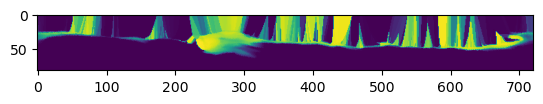

In [21]:
plt.imshow(grid_z0.T)

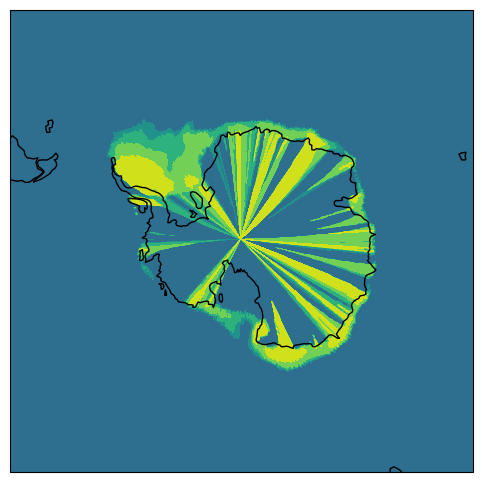

In [25]:
fig = plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=1, color='0.8')
ax.add_feature(cfeature.COASTLINE, linewidth=1)


im0 = ax.contourf(grid_x, grid_y, grid_z0, transform = ccrs.PlateCarree())


In [10]:
x, y = np.meshgrid(np.sort(np.unique(newtestdata.lon)), np.sort(np.unique(newtestdata.lat)))

In [34]:
data = np.empty_like(x)

In [19]:
x

array([[-179.98702792, -179.94433978, -179.90089294, ...,  179.96700861,
         179.96927132,  179.9923751 ],
       [-179.98702792, -179.94433978, -179.90089294, ...,  179.96700861,
         179.96927132,  179.9923751 ],
       [-179.98702792, -179.94433978, -179.90089294, ...,  179.96700861,
         179.96927132,  179.9923751 ],
       ...,
       [-179.98702792, -179.94433978, -179.90089294, ...,  179.96700861,
         179.96927132,  179.9923751 ],
       [-179.98702792, -179.94433978, -179.90089294, ...,  179.96700861,
         179.96927132,  179.9923751 ],
       [-179.98702792, -179.94433978, -179.90089294, ...,  179.96700861,
         179.96927132,  179.9923751 ]])

In [35]:
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
data[:] = np.nan

: 

In [27]:
newtestdata.where(newtestdata.lat == y[0,0], drop=True).values

array([0.03035188], dtype=float32)

In [29]:
data[0,0]  = newtestdata.where(newtestdata.lat == y[0,0], drop=True).values

In [ ]:
data

In [32]:
for j in range(0, np.shape(data)[0]):
    for i in range(0, np.shape(data)[1]):
        data[i,j] = newtestdata.where(newtestdata.lat == y[i, j], drop=True).values

KeyboardInterrupt: 

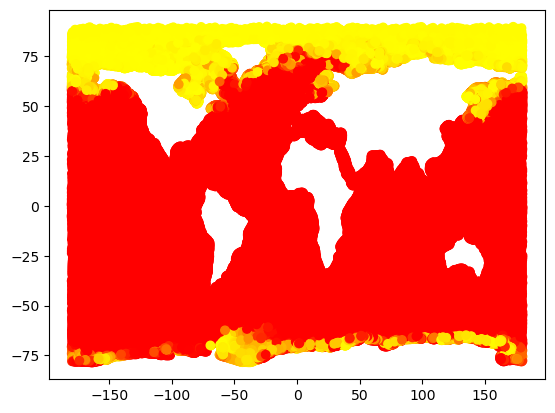

In [54]:
plt.scatter(testdata.lon.values, testdata.lat.values, c = testdata.values, cmap = plt.cm.autumn)

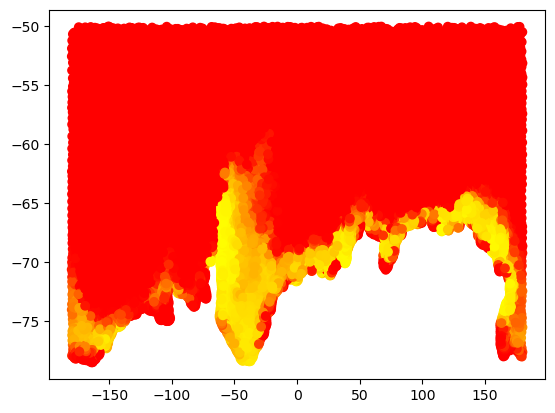

In [57]:
plt.scatter(newtestdata.lon.values, newtestdata.lat.values, c = newtestdata.values, cmap = plt.cm.autumn)

In [48]:
len(np.unique(ds.lon))

126859

In [46]:
newlon, newlat = np.meshgrid(lon_value, lat_value)

MemoryError: Unable to allocate 120. GiB for an array with shape (126859, 126859) and data type float64

In [30]:
testy = [-89, -40, -20, 20, 40, 89]
testx = [0, 15, 60, 90, 140, 200, 350]

In [41]:
a, b = np.meshgrid(testx, testy)

In [42]:
a

array([[  0,  15,  60,  90, 140, 200, 350],
       [  0,  15,  60,  90, 140, 200, 350],
       [  0,  15,  60,  90, 140, 200, 350],
       [  0,  15,  60,  90, 140, 200, 350],
       [  0,  15,  60,  90, 140, 200, 350],
       [  0,  15,  60,  90, 140, 200, 350]])

In [43]:
np.shape(a)

(6, 7)

In [29]:
ds

<xarray.Dataset>
Dimensions:    (ncells: 126859, vertices: 18, time: 1200, bnds: 2)
Coordinates:
    lat        (ncells) float64 dask.array<chunksize=(126859,), meta=np.ndarray>
    lat_bnds   (ncells, vertices) float64 dask.array<chunksize=(126859, 18), meta=np.ndarray>
    lon        (ncells) float64 dask.array<chunksize=(126859,), meta=np.ndarray>
    lon_bnds   (ncells, vertices) float64 dask.array<chunksize=(126859, 18), meta=np.ndarray>
  * time       (time) datetime64[ns] 1855-01-16T12:00:00 ... 1954-12-16T12:00:00
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(1200, 2), meta=np.ndarray>
Dimensions without coordinates: ncells, vertices, bnds
Data variables:
    siconc     (time, ncells) float32 dask.array<chunksize=(103, 126859), meta=np.ndarray>
Attributes: (12/42)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  617262.0
    creation_date:          2020-02-12T12:00:00Z
    ...                     ...
    table_id:               SImon
    tracking_id:            hdl:21.14100/997996f5-6a06-4090-8621-9290928911fd...
    variable_id:            siconc
    variant_label:          r1i1p1f1
    netcdf_tracking_ids:    hdl:21.14100/997996f5-6a06-4090-8621-9290928911fd...
    version_id:             v20200212

In [7]:
datapd.at[1,'zstore']

'gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/piControl/r1i1p1f1/SImon/siconc/gr/v20180701/'

In [4]:
from scipy import ndimage
from skimage import measure
from skimage.segmentation import flood_fill

In [22]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as colors
import matplotlib.path as mpath

In [6]:
from intake import open_esm_datastore
col = open_esm_datastore("https://storage.googleapis.com/cmip6/pangeo-cmip6.json")

In [8]:
cat = col.search(variable_id = ['siconc'], experiment_id = 'piControl', table_id = 'SImon')
nlist = cat.df.source_id.unique()
collist = list(cat)

In [11]:
cat = col.search(variable_id = ['areacello'], experiment_id = 'piControl')
nlist = cat.df.source_id.unique()
collist = list(cat)

In [13]:
cat.df.to_csv("areacello.csv")

In [25]:
cat.df.to_csv("dataset.csv")

In [23]:
ds_dict = {}
n = 0
# with open("dataset.csv", "w+") as wf:
for l in zstores:
    nl = l.split("/")
    for i in nl:
        print(i)    
    n = n + 1
    if n > 4:
        break


    

gs:

cmip6
CMIP6
CMIP
NOAA-GFDL
GFDL-CM4
piControl
r1i1p1f1
SImon
siconc
gn
v20180701

gs:

cmip6
CMIP6
CMIP
NOAA-GFDL
GFDL-ESM4
piControl
r1i1p1f1
SImon
siconc
gr
v20180701

gs:

cmip6
CMIP6
CMIP
NOAA-GFDL
GFDL-ESM4
piControl
r1i1p1f1
SImon
siconc
gn
v20180701

gs:

cmip6
CMIP6
CMIP
CNRM-CERFACS
CNRM-CM6-1
piControl
r1i1p1f2
SImon
siconc
gn
v20180814

gs:

cmip6
CMIP6
CMIP
CNRM-CERFACS
CNRM-ESM2-1
piControl
r1i1p1f2
SImon
siconc
gn
v20181115



In [8]:
def detect_polynya(dasic, criteria, a):
    s = ndimage.generate_binary_structure(2,2)
    da = dasic <= criteria
    da_masked = xr.DataArray(np.nan, dims = dasic.dims, coords = dasic.coords)
    for year in da.time:
        sic = da.sel(time = year)
        sic = xr.where(np.isnan(dasic.sel(time = year)), True, sic) # get rid of "coastal polynya"
        labeled_image, _ = ndimage.label(sic, structure = s)
        region_props = measure.regionprops(labeled_image)
        polygons = []
        for props in region_props:
            if props.area > a:  # the area of ose 'polynya' within the sea ice extent is small
                continue
            polygons.append(props)
        mask = np.zeros_like(labeled_image)
        for props in polygons:
            coords = props.coords
            for coord in coords:         
                mask[coord[0], coord[1]] = 1
        da_masked.loc[year] = xr.where(mask, dasic.sel(time = year), np.nan)
    return da_masked.mean('time'), da_masked.count('time'),

In [ ]:
def detect_polynya2(da, xn1, yn1, xn2, yn2, tn):
    for year in da.time:
        sic = da.sel(time = year)
        sic = xr.where(np.isnan(sic), 0, sic)
        
        sic_out1 = flood_fill(sic, (xn1, yn1), 100, tolerance = tn)
        sic_out2 = flood_fill(sic_out1, (xn2, yn2), 100, tolerance = tn)
        
        

        labeled_image, _ = ndimage.label(sic, structure = s)
        region_props = measure.regionprops(labeled_image)
        polygons = []
        for props in region_props:
            if props.area > a:  # the area of ose 'polynya' within the sea ice extent is small
                continue
            polygons.append(props)
        mask = np.zeros_like(labeled_image)
        for props in polygons:
            coords = props.coords
            for coord in coords:         
                mask[coord[0], coord[1]] = 1
        da_masked.loc[year] = xr.where(mask, dasic.sel(time = year), np.nan)
    return da_masked.mean('time'), da_masked.count('time'),

In [10]:
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
n = 56

for l in collist[n:]:
    # if n == 1:
    #     break
# for l in newcolist:
    n+=1
    if (l == 'CMIP.AWI.AWI-ESM-1-1-LR.piControl.SImon.gn'  or # list of lon lat
        l == 'CMIP.EC-Earth-Consortium.EC-Earth3-LR.piControl.SIclim.gn' or # 1 year  
        # l == 'CMIP.CNRM-CERFACS.CNRM-CM6-1-HR.piControl.SImon.gn' or # can not plot
        l == 'CMIP.CNRM-CERFACS.CNRM-CM6-1.piControl.SImon.gn' or 
        l == 'CMIP.IPSL.IPSL-CM6A-LR.piControl.SImon.gn' or 
        l == 'CMIP.MPI-M.ICON-ESM-LR.piControl.SImon.gn' or 
        l == 'CMIP.THU.CIESM.piControl.SImon.gn' or 
        l == 'CMIP.CNRM-CERFACS.CNRM-ESM2-1.piControl.SImon.gn' or 
        l == 'CMIP.CCCma.CanESM5.piControl.SImon.gn' or 
        l == 'CMIP.CCCma.CanESM5-CanOE.piControl.SImon.gn' or 
        l == 'CMIP.MOHC.HadGEM3-GC31-LL.piControl.SImon.gn' or 
        l == 'CMIP.IPSL.IPSL-CM5A2-INCA.piControl.SImon.gn'):    
        continue
    print(l)
    mapper = gcs.get_mapper(cat[l].df.zstore[0])
    ds = xr.open_zarr(mapper, consolidated=True)
    da = ds.siconc
    # print(da.dims)
    # print(da.shape)
    # if da.shape[-1] < 300:
    #     continue
    # print(da.coords)
    
    da_sep = list(da.groupby('time.month'))[8][-1]
    
    if 'type' in da_sep.coords:
        da_sep = da_sep.reset_coords('type', drop = True)
    
    if 'lat' in da_sep.dims:
        da_so = da_sep.sel(lat = slice(-90, -50))
        pltx = da_so.lon
        plty = da_so.lat
    elif 'latitude' in da_sep.coords:
        da_so = da_sep.where(da_sep.latitude < -50)
        pltx = da_so.longitude
        plty = da_so.latitude
    elif (l == 'CMIP.CNRM-CERFACS.CNRM-CM6-1-HR.piControl.SImon.gn' or 
          l == 'CMIP.CNRM-CERFACS.CNRM-CM6-1.piControl.SImon.gn' or
          l == 'CMIP.NCAR.CESM2-WACCM.piControl.SImon.gn' or
          l == 'CMIP.AWI.AWI-ESM-1-1-LR.piControl.SImon.gn' or 
          l == 'CMIP.NCAR.CESM2-WACCM-FV2.piControl.SImon.gn' or 
          l == 'CMIP.NCAR.CESM2-FV2.piControl.SImon.gn' or 
          l == 'CMIP.NUIST.NESM3.piControl.SImon.gn' or 
          l == 'CMIP.CNRM-CERFACS.CNRM-ESM2-1.piControl.SImon.gn' or 
          l == 'CMIP.NCAR.CESM2.piControl.SImon.gn'):
        # print('a')
        da_so = da_sep.where(da_sep.lat < -50)
        pltx = da_so.lon
        plty = da_so.lat
        if l == 'CMIP.NCAR.CESM2-WACCM.piControl.SImon.gn':
            pltx = da_so.lon.isel(time =0)
            plty = da_so.lat.isel(time =0)
    elif 'nav_lat' in da_sep.coords:
        da_so = da_sep.where(da_sep.nav_lat < -50)
        pltx = da_so.nav_lon
        plty = da_so.nav_lat
    elif 'y' in da_sep.dims:
        da_so = da_sep.sel(y = slice(-90, -50))
        pltx = da_so.x
        plty = da_so.y
    
    da_so = da_so.load()
    # if l == 'CMIP.SNU.SAM0-UNICON.piControl.SImon.gn':
    #     a = 100
    da_region, da_count = detect_polynya(da_so, 30, 1000)   

    da_avg = da_so.mean('time')

    pltdata = da_count.where(da_count>0)/len(da_so.time)
    
    pltdata0 = da_avg

    fig = plt.figure(figsize=(12,6))
    ax = plt.axes(projection=ccrs.SouthPolarStereo())
    ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, zorder=1, color='0.8')
    ax.add_feature(cfeature.COASTLINE, linewidth=1)
    
    gl = ax.gridlines(
        xlocs = np.arange(-180,180,30), 
        ylocs = np.arange(-90,90,20),
        draw_labels=True, y_inline=True)
    
    im0 = ax.contourf(pltx, plty, pltdata0, transform = ccrs.PlateCarree(), 
                      cmap = plt.cm.Greys_r, levels=np.linspace(0,100,101))
    im = ax.contourf(pltx, plty, pltdata, 
                     transform=ccrs.PlateCarree())#, levels = my_level, cmap=plt.cm.jet)
    
    ax.set_boundary(circle, transform=ax.transAxes)
    cbar = plt.colorbar(im)
    
    fig.savefig('figs30/{}.png'.format(l))
    
    print(n)

CMIP.EC-Earth-Consortium.EC-Earth3-CC.piControl.SImon.gn
24
CMIP.NCAR.CESM2-WACCM.piControl.SImon.gn
25
CMIP.NOAA-GFDL.GFDL-ESM4.piControl.SImon.gr
26
CMIP.CAMS.CAMS-CSM1-0.piControl.SImon.gn
27
CMIP.MPI-M.MPI-ESM1-2-LR.piControl.SImon.gn
28
CMIP.EC-Earth-Consortium.EC-Earth3.piControl.SImon.gn
29
CMIP.MOHC.UKESM1-0-LL.piControl.SImon.gn
30
CMIP.NCAR.CESM2-WACCM-FV2.piControl.SImon.gn
31
CMIP.E3SM-Project.E3SM-1-1-ECA.piControl.SImon.gr
32
CMIP.NUIST.NESM3.piControl.SImon.gn
33
CMIP.MIROC.MIROC-ES2L.piControl.SImon.gr1
34
CMIP.INM.INM-CM5-0.piControl.SImon.gr1
36
CMIP.NASA-GISS.GISS-E2-1-H.piControl.SImon.gr
37
CMIP.BCC.BCC-ESM1.piControl.SImon.gn
38
CMIP.EC-Earth-Consortium.EC-Earth3-LR.piControl.SImon.gn
39
CMIP.MIROC.MIROC6.piControl.SImon.gn
40
CMIP.EC-Earth-Consortium.EC-Earth3-Veg-LR.piControl.SImon.gn
41
CMIP.SNU.SAM0-UNICON.piControl.SImon.gn
43
CMIP.CMCC.CMCC-CM2-SR5.piControl.SImon.gn
44
CMIP.AS-RCEC.TaiESM1.piControl.SImon.gn
45
CMIP.MPI-M.MPI-ESM1-2-HR.piControl.SImon.gn
46

: 

: 

In [ ]:
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
n = 0

from skimage import data, filters
from skimage.segmentation import flood, flood_fill

for l in collist[n:]:
    # if n == 1:
    #     break
# for l in newcolist:
    n+=1
    if (l == 'CMIP.AWI.AWI-ESM-1-1-LR.piControl.SImon.gn'  or # list of lon lat
        l == 'CMIP.EC-Earth-Consortium.EC-Earth3-LR.piControl.SIclim.gn' or # 1 year  
        # l == 'CMIP.CNRM-CERFACS.CNRM-CM6-1-HR.piControl.SImon.gn' or # can not plot
        l == 'CMIP.CNRM-CERFACS.CNRM-CM6-1.piControl.SImon.gn' or 
        l == 'CMIP.IPSL.IPSL-CM6A-LR.piControl.SImon.gn' or 
        l == 'CMIP.MPI-M.ICON-ESM-LR.piControl.SImon.gn' or 
        l == 'CMIP.THU.CIESM.piControl.SImon.gn' or 
        l == 'CMIP.CNRM-CERFACS.CNRM-ESM2-1.piControl.SImon.gn' or 
        # l == 'CMIP.CCCma.CanESM5.piControl.SImon.gn' or 
        # l == 'CMIP.CCCma.CanESM5-CanOE.piControl.SImon.gn' or 
        l == 'CMIP.MOHC.HadGEM3-GC31-LL.piControl.SImon.gn' or 
        l == 'CMIP.IPSL.IPSL-CM5A2-INCA.piControl.SImon.gn'):    
        continue
    print(l)
    mapper = gcs.get_mapper(cat[l].df.zstore[0])
    ds = xr.open_zarr(mapper, consolidated=True)
    da = ds.siconc
    # print(da.dims)
    # print(da.shape)
    # if da.shape[-1] < 300:
    #     continue
    # print(da.coords)
    
    da_sep = list(da.groupby('time.month'))[8][-1]
    
    if 'type' in da_sep.coords:
        da_sep = da_sep.reset_coords('type', drop = True)
    
    if 'lat' in da_sep.dims:
        da_so = da_sep.sel(lat = slice(-90, -50))
        pltx = da_so.lon
        plty = da_so.lat
    elif 'latitude' in da_sep.coords:
        da_so = da_sep.where(da_sep.latitude < -50)
        pltx = da_so.longitude
        plty = da_so.latitude
    elif (l == 'CMIP.CNRM-CERFACS.CNRM-CM6-1-HR.piControl.SImon.gn' or 
          l == 'CMIP.CNRM-CERFACS.CNRM-CM6-1.piControl.SImon.gn' or
          l == 'CMIP.NCAR.CESM2-WACCM.piControl.SImon.gn' or
          l == 'CMIP.AWI.AWI-ESM-1-1-LR.piControl.SImon.gn' or 
          l == 'CMIP.NCAR.CESM2-WACCM-FV2.piControl.SImon.gn' or 
          l == 'CMIP.NCAR.CESM2-FV2.piControl.SImon.gn' or 
          l == 'CMIP.NUIST.NESM3.piControl.SImon.gn' or 
          l == 'CMIP.CNRM-CERFACS.CNRM-ESM2-1.piControl.SImon.gn' or 
          l == 'CMIP.NCAR.CESM2.piControl.SImon.gn'):
        # print('a')
        da_so = da_sep.where(da_sep.lat < -50)
        pltx = da_so.lon
        plty = da_so.lat
        if l == 'CMIP.NCAR.CESM2-WACCM.piControl.SImon.gn':
            pltx = da_so.lon.isel(time =0)
            plty = da_so.lat.isel(time =0)
    elif 'nav_lat' in da_sep.coords:
        da_so = da_sep.where(da_sep.nav_lat < -50)
        pltx = da_so.nav_lon
        plty = da_so.nav_lat
    elif 'y' in da_sep.dims:
        da_so = da_sep.sel(y = slice(-90, -50))
        pltx = da_so.x
        plty = da_so.y
    
    da_so = da_so.load()
    # if l == 'CMIP.SNU.SAM0-UNICON.piControl.SImon.gn':
    #     a = 100
    da_region, da_count = detect_polynya(da_so, 30, 10000)   

    da_avg = da_so.mean('time')

    pltdata = da_count.where(da_count>0)/len(da_so.time)
    
    pltdata0 = da_avg

    fig = plt.figure(figsize=(12,6))
    ax = plt.axes(projection=ccrs.SouthPolarStereo())
    ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, zorder=1, color='0.8')
    ax.add_feature(cfeature.COASTLINE, linewidth=1)
    
    gl = ax.gridlines(
        xlocs = np.arange(-180,180,30), 
        ylocs = np.arange(-90,90,20),
        draw_labels=True, y_inline=True)
    
    im0 = ax.contourf(pltx, plty, pltdata0, transform = ccrs.PlateCarree(), 
                      cmap = plt.cm.Greys_r, levels=np.linspace(0,100,101))
    im = ax.contourf(pltx, plty, pltdata, 
                     transform=ccrs.PlateCarree())#, levels = my_level, cmap=plt.cm.jet)
    
    ax.set_boundary(circle, transform=ax.transAxes)
    cbar = plt.colorbar(im)
    
    fig.savefig('figs30/{}.png'.format(l))
    
    print(n)

In [31]:
pltdata

<xarray.DataArray (j: 291, i: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * i          (i) int32 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * j          (j) int32 0 1 2 3 4 5 6 7 8 ... 283 284 285 286 287 288 289 290
    latitude   (j, i) float64 -78.39 -78.39 -78.39 -78.39 ... 50.51 50.23 50.01
    longitude  (j, i) float64 73.5 74.5 75.5 76.5 ... 72.93 72.95 72.96 72.99

In [21]:
test = pltdata

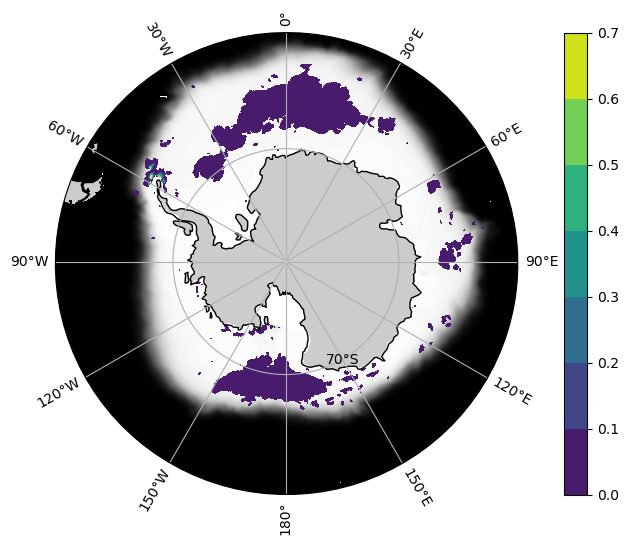

In [36]:
fig = plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, zorder=1, color='0.8')
ax.add_feature(cfeature.COASTLINE, linewidth=1)
     
# im0 = ax.contourf(pltdata0.longitude, test.latitude, test, transform = ccrs.PlateCarree()) 
#                     #   cmap = plt.cm.Greys_r, levels=np.linspace(0,100,101))
gl = ax.gridlines(
    xlocs = np.arange(-180,180,30), 
    ylocs = np.arange(-90,90,20),
    draw_labels=True, y_inline=True)
    
im0 = ax.contourf(pltdata0.lon, pltdata0.lat, pltdata0, transform = ccrs.PlateCarree(), 
                      cmap = plt.cm.Greys_r, levels=np.linspace(0,100,101))
im = ax.contourf(pltdata.lon, pltdata.lat, pltdata, 
                     transform=ccrs.PlateCarree())#, levels = my_level, cmap=plt.cm.jet)
    
ax.set_boundary(circle, transform=ax.transAxes)
cbar = plt.colorbar(im)
    
fig.savefig('figs/{}.png'.format(l))
    
    

ImportError: Missing optional dependency 'tabulate'.  Use pip or conda to install tabulate.

In [17]:
cat['CMIP.NOAA-GFDL.GFDL-CM4.piControl.SIday.gr2'].df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version,_data_format_
0,CMIP,NOAA-GFDL,GFDL-CM4,piControl,r1i1p1f1,SIday,siconc,gr2,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/piCon...,NaN,20180701,zarr


In [20]:
mapper = gcs.get_mapper(cat['CMIP.EC-Earth-Consortium.EC-Earth3-LR.piControl.SIclim.gn'].df.zstore[0])
ds = xr.open_zarr(mapper, consolidated=True)
da = ds.siconc
da 

<xarray.DataArray 'siconc' (time: 12, j: 292, i: 362)>
dask.array<open_dataset-3800c3921cfe8193011b12adaf22b36dsiconc, shape=(12, 292, 362), dtype=float32, chunksize=(12, 292, 362), chunktype=numpy.ndarray>
Coordinates:
  * i          (i) int32 1 2 3 4 5 6 7 8 9 ... 355 356 357 358 359 360 361 362
  * j          (j) int32 1 2 3 4 5 6 7 8 9 ... 285 286 287 288 289 290 291 292
    latitude   (j, i) float32 dask.array<chunksize=(292, 362), meta=np.ndarray>
    longitude  (j, i) float32 dask.array<chunksize=(292, 362), meta=np.ndarray>
  * time       (time) datetime64[ns] 1991-01-16T12:00:00 ... 1991-12-16T12:00:00
    type       |S7 ...
Attributes:
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Area fraction of grid cell covered by sea ice
    history:        2018-11-19T21:48:33Z altered by CMOR: Treated scalar dime...
    long_name:      Sea Ice Area Fraction (Ocean Grid)
    original_name:  siconc
    standard_name:  sea_ice_area_fraction
    units:          %

In [16]:
da_sep = list(da.groupby('time.month'))[8][-1]
da_sep

<xarray.DataArray 'siconc' (time: 4200, lat: 90, lon: 144)>
dask.array<getitem, shape=(4200, 90, 144), dtype=float32, chunksize=(360, 90, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) object 0276-09-01 12:00:00 ... 0415-09-30 12:00:00
Attributes:
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Sea Ice Area Fraction (Ocean Grid)
    original_name:  siconc
    standard_name:  sea_ice_area_fraction
    units:          %

In [14]:
n = 2

for l in collist[n:]:
    print(l)
    mapper = gcs.get_mapper(cat[l].df.zstore[0])
    ds = xr.open_zarr(mapper, consolidated=True)
    da = ds.siconc
    
    da_sep = list(da.groupby('time.month'))[8][-1]
    da_sep.to_netcdf('dataset/{}.nc'.format(l))
    n += 1
    print(n)


CMIP.NCAR.CESM2-WACCM-FV2.piControl.SImon.gn
3
CMIP.NOAA-GFDL.GFDL-CM4.piControl.SIday.gr2
4
CMIP.EC-Earth-Consortium.EC-Earth3-CC.piControl.SImon.gn
5
CMIP.NOAA-GFDL.GFDL-CM4.piControl.SImon.gr
6
CMIP.CCCma.CanESM5-CanOE.piControl.SImon.gn
7
CMIP.INM.INM-CM4-8.piControl.SImon.gr1
8
CMIP.MOHC.UKESM1-0-LL.piControl.SImon.gn
9
CMIP.E3SM-Project.E3SM-1-1-ECA.piControl.SImon.gr
10
CMIP.BCC.BCC-CSM2-MR.piControl.SImon.gn
11
CMIP.CMCC.CMCC-ESM2.piControl.SImon.gn
12
CMIP.CAS.CAS-ESM2-0.piControl.SImon.gn
13
CMIP.IPSL.IPSL-CM5A2-INCA.piControl.SImon.gn
14
CMIP.EC-Earth-Consortium.EC-Earth3-LR.piControl.SImon.gn
15
CMIP.CSIRO.ACCESS-ESM1-5.piControl.SImon.gn
16
CMIP.CAMS.CAMS-CSM1-0.piControl.SImon.gn
17
CMIP.E3SM-Project.E3SM-1-0.piControl.SImon.gr
18
CMIP.INM.INM-CM5-0.piControl.SImon.gr1
19
CMIP.AWI.AWI-ESM-1-1-LR.piControl.SImon.gn
20
CMIP.NASA-GISS.GISS-E2-1-H.piControl.SImon.gr
21
CMIP.E3SM-Project.E3SM-1-1.piControl.SImon.gr
22
CMIP.MIROC.MIROC-ES2L.piControl.SImon.gn
23
CMIP.NCC.NorESM